In [1]:
import os
import sys
import random
import math
import re
import time
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Root directory of the project
ROOT_DIR = os.path.abspath("../../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log

from samples.workersDetection1 import workersDetection1

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")
print(ROOT_DIR)

# Path to Ballon trained weights
# You can download this file from the Releases page
# https://github.com/matterport/Mask_RCNN/releases
#BALLON_WEIGHTS_PATH = /home/sai/anaconda3/Mask_RCNN/logs/workersdetection20200806T0040/mask_rcnn_workersdetection_0030.h5  
# TODO: update this path                                                                                                                                                                                                            

/home/sai/anaconda3/Mask_RCNN


Using TensorFlow backend.


In [2]:
config = workersDetection1.WorkersDetectionConfig()
WORKERS_DIR = os.path.join(ROOT_DIR, "dataset1")


In [3]:

# Override the training configurations with a few
# changes for inferencing.
class InferenceConfig(config.__class__):
    # Run detection on one image at a time
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    DETECTION_MIN_CONFIDENCE = 0.5
    

config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.5
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                18
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

In [4]:
# Device to load the neural network on.
# Useful if you're training a model on the same 
# machine, in which case use CPU and leave the
# GPU for training.
DEVICE = "/cpu:0"  # /cpu:0 or /gpu:0

# Inspect the model in training or inference modes
# values: 'inference' or 'training'
# TODO: code for 'training' test mode not ready yet
TEST_MODE = "inference"

In [5]:
def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

In [6]:
# Load validation dataset
dataset = workersDetection1.WorkersDetectionDataset()
dataset.load_workers(WORKERS_DIR, "val")

# Must call before using the dataset
dataset.prepare()

#print("Images: {}\nClasses: {}".format(len(dataset.image_ids), dataset.class_names))
print("Classes: {}", dataset.class_names)

Classes: {} ['BG', 'worker', 'strap', 'hardhat', 'hook', 'harness']


In [7]:
# Create model in inference mode
with tf.device(DEVICE):
    model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR,
                              config=config)

In [8]:
weights_path = os.path.join(MODEL_DIR, "workersdetection20201015T0116/mask_rcnn_workersdetection_0060.h5")
print("Loading weights ", weights_path)
model.load_weights(weights_path, by_name=True)

Loading weights  /home/sai/anaconda3/Mask_RCNN/logs/workersdetection20201015T0116/mask_rcnn_workersdetection_0060.h5
Re-starting from epoch 60


image ID: Workers./home/sai/Documents/SITL_site_data_instance/val/img3_0235.png (26) /home/sai/Documents/SITL_site_data_instance/val/img3_0235.png
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 18)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
gt_class_id              shape: (17,)                 min:    1.00000  max:    5.00000  int32
gt_bbox                  shape: (17, 4)               min:  233.00000  max:  799.00000  int32
gt_mask                  shape: (1024, 1024, 17)      min:    0.00000  max:    1.00000  bool
num of classes in image: 15
GT_CLASSES
[1 3 5 1 3 1 3 1 3 5 4 4 2 1 3 5 2]
[1 1 3 1 5 1 3 1 3 5 5 2 3 3 2]
Masks
(1024, 1024, 3)


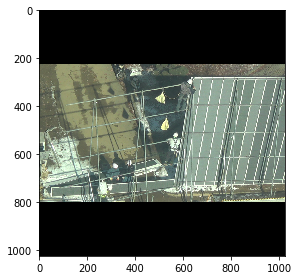

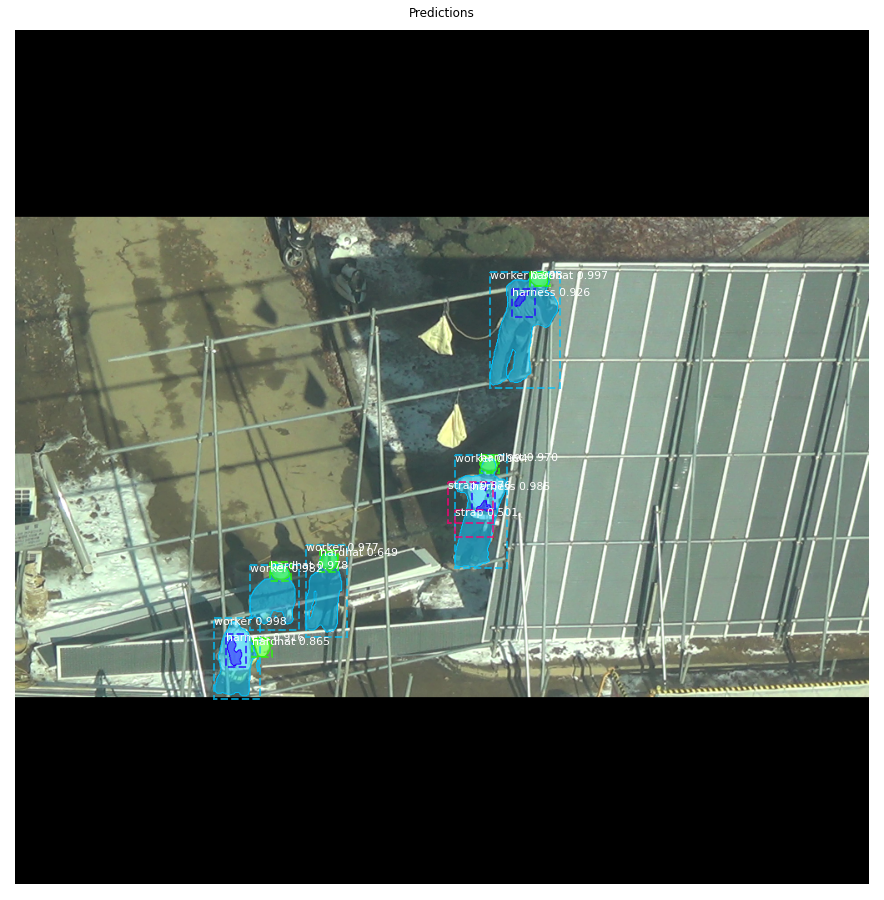

In [9]:
import skimage.io
image_id = 26#random.choice(dataset.image_ids)
#image_id = 76
d=[35,26,70]
image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset, config, image_id, use_mini_mask=False)
info = dataset.image_info[image_id]
print("image ID: {}.{} ({}) {}".format(info["source"], info["id"], image_id, 
                                       dataset.image_reference(image_id)))

# Run object detection
#image = skimage.io.imread("/home/sai/Desktop/test3.jpg")
#image=image[224:800,:,:]
skimage.io.imshow(image)
results = model.detect([image], verbose=1)

# Display results
ax = get_ax(1)
r = results[0]
#print(r['masks'])
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            dataset.class_names, r['scores'], ax=ax,
                            title="Predictions")
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)
print("num of classes in image: "+str(len(r['class_ids'])))
print("GT_CLASSES")
print(gt_class_id)
print(r['class_ids'])
print("Masks")
print(image.shape)

In [10]:
import os
import cv2
import keras
import numpy as np
import matplotlib.pyplot as plt

In [11]:
ROOT_DIR = os.path.abspath("..")
DATA_DIR = os.path.join(ROOT_DIR, "segmentationmodels/dataset")
print(ROOT_DIR)

/home/sai/anaconda3/Mask_RCNN/samples


In [12]:
x_train_dir = os.path.join(DATA_DIR, 'train')
y_train_dir = os.path.join(DATA_DIR, 'trainannot')

x_valid_dir = os.path.join(DATA_DIR, 'val')
y_valid_dir = os.path.join(DATA_DIR, 'valannot')


In [13]:
# helper function for data visualization
def visualizel(**images):
    """PLot images in one row."""
    n = len(images)
    plt.figure(figsize=(26, 26))
    for i, (name, image) in enumerate(images.items()):
        #print(image.shape)
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.title(' '.join(name.split('_')).title())
        plt.imshow(image)
    plt.show()
    
# helper function for data visualization    
def denormalize(x):
    """Scale image to range 0..1 for correct plot"""
    x_max = np.percentile(x, 98)
    x_min = np.percentile(x, 2)    
    x = (x - x_min) / (x_max - x_min)
    x = x.clip(0, 1)
    return x
    

# classes for data loading and preprocessing
class LDataset:
    """CamVid Dataset. Read images, apply augmentation and preprocessing transformations.
    
    Args:
        images_dir (str): path to images folder
        masks_dir (str): path to segmentation masks folder
        class_values (list): values of classes to extract from segmentation mask
        augmentation (albumentations.Compose): data transfromation pipeline 
            (e.g. flip, scale, etc.)
        preprocessing (albumentations.Compose): data preprocessing 
            (e.g. noralization, shape manipulation, etc.)
    
    """
    
    CLASSES = ['worker','strap','hardhat','hook','harness']
    
    def __init__(
            self, 
            images_dir, 
            masks_dir, 
            classes=None, 
            augmentation=None, 
            preprocessing=None,
    ):
        self.ids = os.listdir(images_dir)
        self.images_fps = [os.path.join(images_dir, image_id) for image_id in self.ids]
        self.masks_fps = [os.path.join(masks_dir, image_id) for image_id in self.ids]
        
        # convert str names to class values on masks
        self.class_values = [self.CLASSES.index(cls.lower()) for cls in classes]
        
        self.augmentation = augmentation
        self.preprocessing = preprocessing
    
    def __getitem__(self, i):
        
        # read data
        image = cv2.imread(self.images_fps[i])
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        mask = cv2.imread(self.masks_fps[i], 0)
        
        # extract certain classes from mask (e.g. cars)
        masks = [(mask == v) for v in self.class_values]
        mask = np.stack(masks, axis=-1).astype('float')
        
        # add background if mask is not binary
        if mask.shape[-1] != 1:
            background = 1 - mask.sum(axis=-1, keepdims=True)
            mask = np.concatenate((mask, background), axis=-1)
        
        # apply augmentations
        if self.augmentation:
            sample = self.augmentation(image=image, mask=mask)
            image, mask = sample['image'], sample['mask']
        
        # apply preprocessing
        if self.preprocessing:
            sample = self.preprocessing(image=image, mask=mask)
            image, mask = sample['image'], sample['mask']
            
        return image, mask
        
    def __len__(self):
        return len(self.ids)
    
    
class Dataloder(keras.utils.Sequence):
    """Load data from dataset and form batches
    
    Args:
        dataset: instance of Dataset class for image loading and preprocessing.
        batch_size: Integet number of images in batch.
        shuffle: Boolean, if `True` shuffle image indexes each epoch.
    """
    
    def __init__(self, dataset, batch_size=1, shuffle=False):
        self.dataset = dataset
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.indexes = np.arange(len(dataset))

        self.on_epoch_end()

    def __getitem__(self, i):
        
        # collect batch data
        start = i * self.batch_size
        stop = (i + 1) * self.batch_size
        data = []
        for j in range(start, stop):
            data.append(self.dataset[j])
        
        # transpose list of lists
        batch = [np.stack(samples, axis=0) for samples in zip(*data)]
        
        return tuple(batch)
    
    def __len__(self):
        """Denotes the number of batches per epoch"""
        return len(self.indexes) // self.batch_size
    
    def on_epoch_end(self):
        """Callback function to shuffle indexes each epoch"""
        if self.shuffle:
            self.indexes = np.random.permutation(self.indexes)

(1080, 1920, 6)


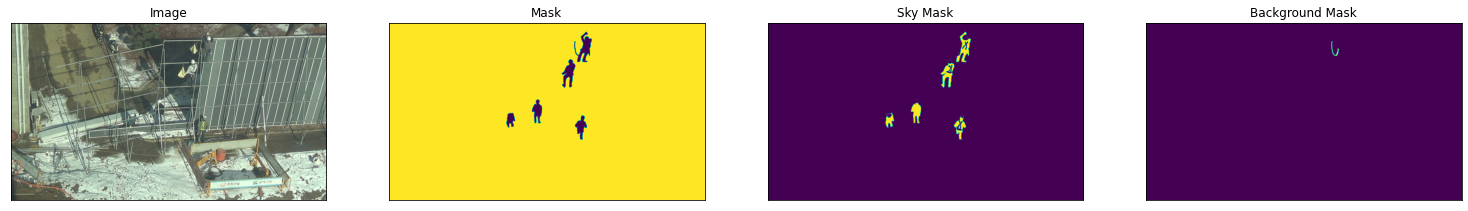

In [14]:
# Lets look at data we have
datasetl = LDataset(x_train_dir, y_train_dir, classes=['worker','strap','hardhat','hook','harness'])
#print(dataset)
image, mask = datasetl[316] # get some sample
print(mask.shape)
visualizel(
    image=image, 
    mask=mask[..., 0].squeeze(),
    sky_mask=mask[..., 1].squeeze(),
    background_mask=mask[..., 2].squeeze(),
)

In [15]:
import albumentations as A

In [16]:
def round_clip_0_1(x, **kwargs):
    return x.round().clip(0, 1)

# define heavy augmentations
def get_training_augmentation():
    train_transform = [

        #A.HorizontalFlip(p=0.5),

        #A.ShiftScaleRotate(scale_limit=0.5, rotate_limit=0, shift_limit=0.1, p=1, border_mode=0),

        #A.PadIfNeeded(min_height=512, min_width=512, always_apply=True, border_mode=0),
        #A.RandomCrop(height=512, width=512, always_apply=True),
        A.Resize(height=1024, width=1024, p=1),

        #A.IAAAdditiveGaussianNoise(p=0.2),
        #A.IAAPerspective(p=0.5),

        A.Lambda(mask=round_clip_0_1)
    ]
    return A.Compose(train_transform)


def get_validation_augmentation():
    """Add paddings to make image shape divisible by 32"""
    test_transform = [
        #A.PadIfNeeded(min_height=512, min_width=512, always_apply=True, border_mode=0),
        #A.RandomCrop(height=512, width=512, always_apply=True),
        A.Resize(height=576, width=1024, p=1),
    ]
    return A.Compose(test_transform)

def get_preprocessing(preprocessing_fn):
    """Construct preprocessing transform
    
    Args:
        preprocessing_fn (callbale): data normalization function 
            (can be specific for each pretrained neural network)
    Return:
        transform: albumentations.Compose
    
    """
    
    _transform = [
        A.Lambda(image=preprocessing_fn),
    ]
    return A.Compose(_transform)

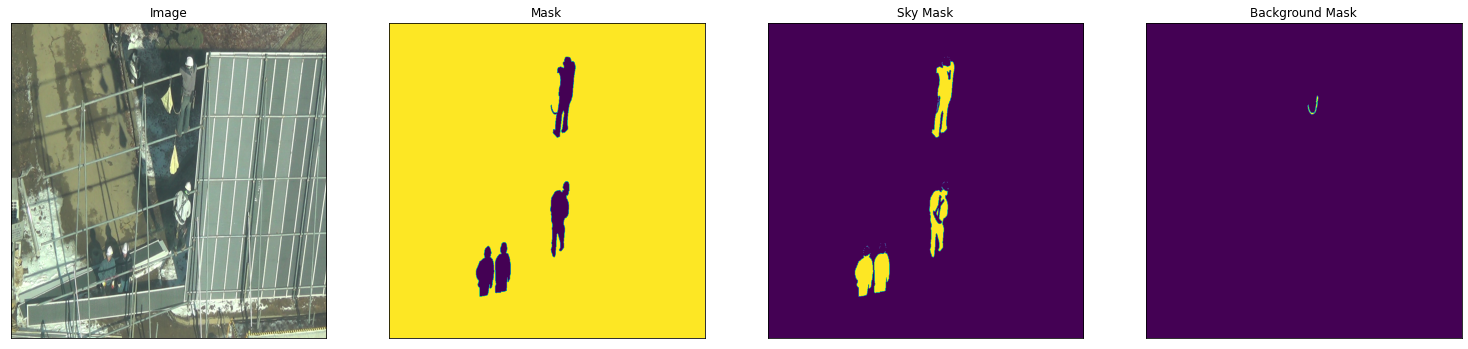

In [17]:
# Lets look at augmented data we have
datasetl = LDataset(x_valid_dir, y_valid_dir, classes=['worker','strap','hardhat','hook','harness'], augmentation=get_training_augmentation())
image, mask = datasetl[11] # get some sample
visualizel(
    image=image, 
    mask=mask[..., 0].squeeze(),
    sky_mask=mask[..., 1].squeeze(),
    background_mask=mask[..., 2].squeeze(),
)

In [18]:
%env SM_FRAMEWORK=tf.keras
import segmentation_models as sm

env: SM_FRAMEWORK=tf.keras
Segmentation Models: using `tf.keras` framework.


In [19]:
BACKBONE = 'efficientnetb3'
BATCH_SIZE = 1
CLASSES = ['worker','strap','hardhat','hook','harness']
LR = 0.001
EPOCHS = 30

preprocess_input = sm.get_preprocessing(BACKBONE)

In [20]:
# define network parameters
n_classes = 1 if len(CLASSES) == 1 else (len(CLASSES) + 1)  # case for binary and multiclass segmentation
activation = 'sigmoid' if n_classes == 1 else 'softmax'

#create model
modell = sm.Linknet(BACKBONE, classes=n_classes, activation=activation)

In [21]:
optim = keras.optimizers.Adam(LR)

# Segmentation models losses can be combined together by '+' and scaled by integer or float factor
# set class weights for dice_loss (car: 1.; pedestrian: 2.; background: 0.5;)
dice_loss = sm.losses.DiceLoss(class_weights=np.array([1, 1, 1, 1, 1, 0.5])) 
focal_loss = sm.losses.BinaryFocalLoss() if n_classes == 1 else sm.losses.CategoricalFocalLoss()
total_loss = dice_loss + (1 * focal_loss)

# actulally total_loss can be imported directly from library, above example just show you how to manipulate with losses
# total_loss = sm.losses.binary_focal_dice_loss # or sm.losses.categorical_focal_dice_loss 

metrics = [sm.metrics.IOUScore(threshold=0.5), sm.metrics.FScore(threshold=0.5)]

# compile keras model with defined optimozer, loss and metrics
#model.summary()
modell.compile(optim, total_loss, metrics)

ValueError: ('Could not interpret optimizer identifier:', <keras.optimizers.Adam object at 0x7f6870b49150>)

In [26]:
test_dataset = LDataset(
    x_valid_dir, 
    y_valid_dir, 
    classes=CLASSES, 
    augmentation=get_validation_augmentation(),
    preprocessing=get_preprocessing(preprocess_input),
)

test_dataloader = Dataloder(test_dataset, batch_size=1, shuffle=False)
print(test_dataloader[0][1].shape)

(1, 576, 1024, 6)


In [27]:
# load best weights
modell.load_weights('best_model1.h5')

image ID: Workers./home/sai/Documents/SITL_site_data_instance/val/img3_0202.png (0) /home/sai/Documents/SITL_site_data_instance/val/img3_0202.png
Processing 1 images
image                    shape: (576, 1024, 3)        min:   16.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 18)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
(576, 1024, 12)


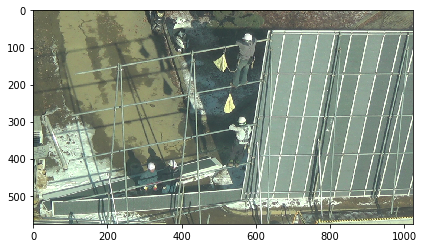

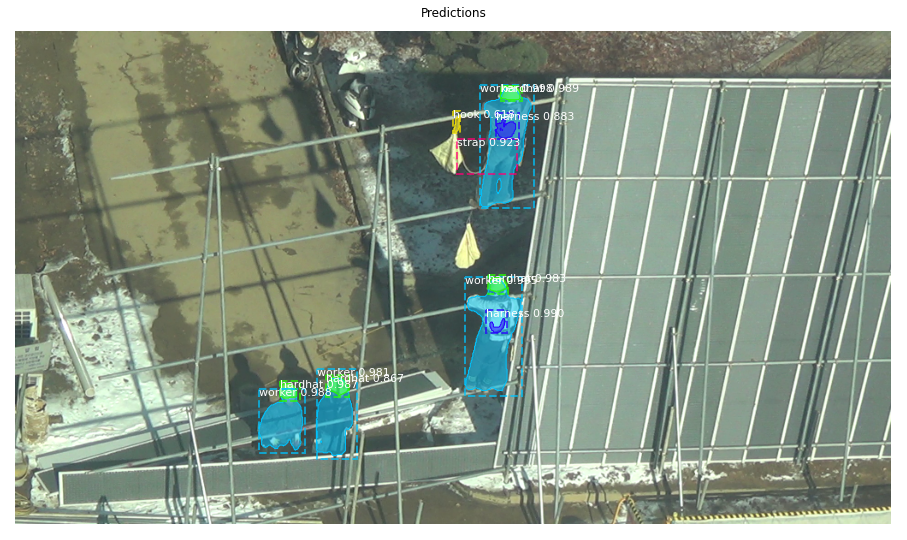

In [28]:
import skimage.io
image_id = 0 #random.choice(dataset.image_ids)
#image_id = 76
d=[35,26,70]
image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset, config, image_id, use_mini_mask=False)
info = dataset.image_info[image_id]
print("image ID: {}.{} ({}) {}".format(info["source"], info["id"], image_id, 
                                       dataset.image_reference(image_id)))

# Run object detection
#image = skimage.io.imread("/home/sai/Desktop/test3.jpg")
image=image[224:800,:,:]
skimage.io.imshow(image)
results = model.detect([image], verbose=1)

# Display results
ax = get_ax(1)
r = results[0]
print(r['masks'].shape)
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            dataset.class_names, r['scores'], ax=ax,
                            title="Predictions")

In [29]:
filename=info["id"].split("/")[-1]
print(filename)
print(r['class_ids'])
#img3_0199.png
#img3_0202.png

img3_0202.png
[1 1 5 3 1 3 3 1 2 5 3 4]


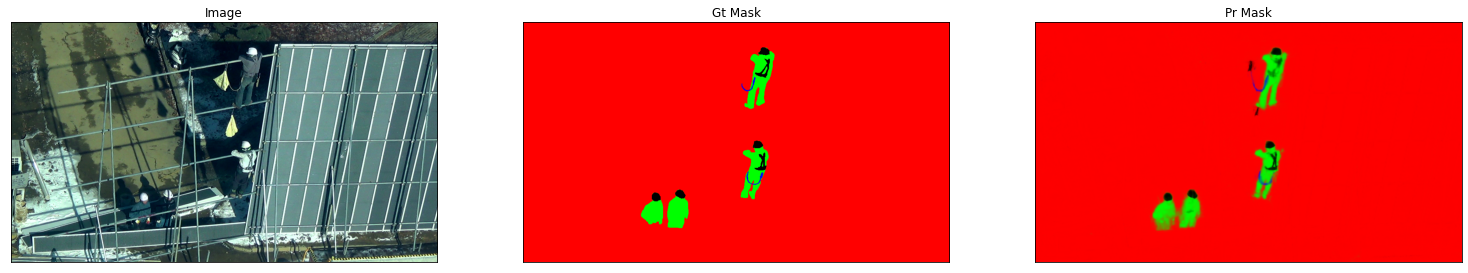

In [30]:
n = 1
#ids = np.random.choice(np.arange(len(test_dataset)), size=n)
#print(ids)
t=os.path.join(DATA_DIR, 'val')
img_fnames=os.listdir(t)

ids = [img_fnames.index(filename)]
for i in ids:
    image, gt_mask = test_dataset[i]
    image = np.expand_dims(image, axis=0)
    pr_mask = modell.predict(image)
    gt_mask=gt_mask[:,:,:3]
    pr_mask=pr_mask[0][:,:,:3]
    #pr_mask=(pr_mask>0.5).astype(int)
    visualizel(
        image=denormalize(image.squeeze()),
        gt_mask=gt_mask.squeeze(),
        pr_mask=pr_mask.squeeze(),
    )

In [31]:
n = 1
print(CLASSES)
t=os.path.join(DATA_DIR, 'val')
img_fnames=os.listdir(t)
print(len(img_fnames))
ids = [img_fnames.index(filename)] #np.random.choice(np.arange(len(test_dataset)), size=n)
print(ids)
for i in ids:
    image, gt_mask = test_dataset[i]
    image = np.expand_dims(image, axis=0)
    pr_mask = modell.predict(image)
    pr_mask=pr_mask[0]


['worker', 'strap', 'hardhat', 'hook', 'harness']
135
[89]


In [32]:
#pr_mask=(pr_mask>0.5).astype(int)
print(pr_mask.shape)

(576, 1024, 6)


In [33]:
#class_ids=r['class_ids']
bboxes=r['rois']
#print(r['class_ids'])
m1=[]
for i,c in enumerate(r['class_ids']):
    mask=np.zeros((576,1024),dtype=int)
    f=0
    if c==1:
        m=pr_mask[:,:,1]
    elif c==2:
        m=pr_mask[:,:,2]
    elif c==3:
        m=pr_mask[:,:,3]
    elif c==4:
        m=pr_mask[:,:,5]
    elif c==5:
        m=pr_mask[:,:,4]
    bb=bboxes[i]
    bb=[int(round(x)) for x in bb]
    for r in range(bb[0]-1,bb[2]):
        for cl in range(bb[1]-1,bb[3]):
            if m[r][cl]>0.5:
                mask[r][cl]=c
            else:
                mask[r][cl]=0
                f+=1
    if f==1024*1024:
        m1.append(r['rois'][i])
    else:
        m1.append(mask)

m1=np.array(m1)    

In [34]:
print(m1.shape)
print(image_id)
"""for i in range(576):
    for j in range(1024):
        if m1[0][i][j]>=1:
            print(m1[0][i][j])
            break"""
    

(12, 576, 1024)
0


'for i in range(576):\n    for j in range(1024):\n        if m1[0][i][j]>=1:\n            print(m1[0][i][j])\n            break'

image ID: Workers./home/sai/Documents/SITL_site_data_instance/val/img3_0202.png (0) /home/sai/Documents/SITL_site_data_instance/val/img3_0202.png
Processing 1 images
image                    shape: (576, 1024, 3)        min:   16.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 18)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
(12, 4)
(12, 576, 1024)
(12,)


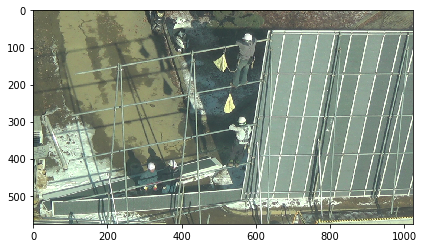

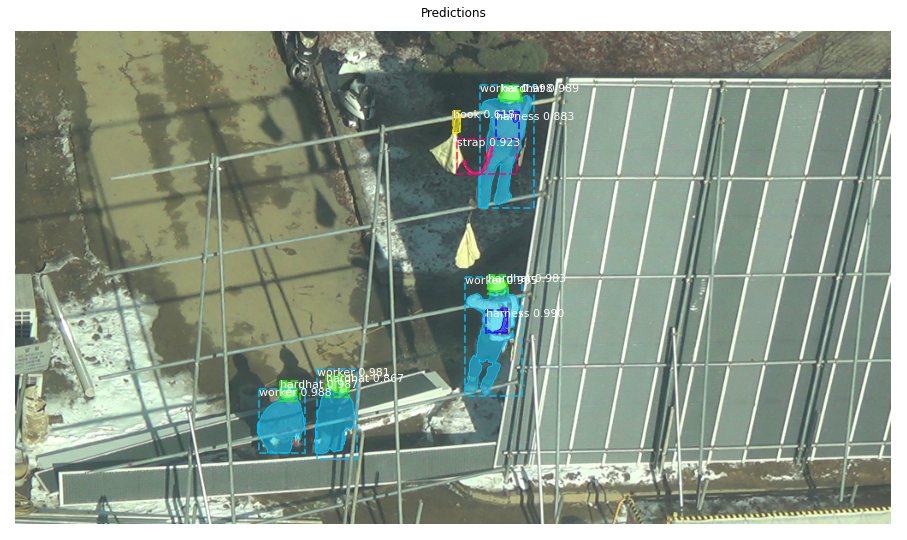

In [35]:
import skimage.io
#image_id = 26#random.choice(dataset.image_ids)
#image_id = 76
d=[35,26,70]
image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset, config, image_id, use_mini_mask=False)
info = dataset.image_info[image_id]
print("image ID: {}.{} ({}) {}".format(info["source"], info["id"], image_id, 
                                       dataset.image_reference(image_id)))

# Run object detection
#image = skimage.io.imread("/home/sai/Desktop/test3.jpg")
image=image[224:800,:,:]
skimage.io.imshow(image)
results = model.detect([image], verbose=1)

# Display results
ax = get_ax(1)
r = results[0]
#print(r['masks'])
integration=1
print(r['rois'].shape)
print(m1.shape)
print(r['class_ids'].shape)
visualize.display_instances(image, r['rois'], m1, r['class_ids'], 
                            dataset.class_names, r['scores'], ax=ax,
                            title="Predictions",integration=2)
cl=r['class_ids']
ma=r['masks']

In [55]:
print(r['class_ids'])

[1 1 5 3 1 3 3 1 2 5 3 4]


In [36]:
def mask_overlap(b1,b2,m1,m2,c,c1):
    f=o=0
    b1=[int(round(x)) for x in b1]
    b2=[int(round(x)) for x in b2]
    #print(b1)
    #print(b2)
    m3=m1+m2
    for i in range(b1[0]-2,576):
        for j in range(b1[1]-2,b1[3]+1):
            if m3[i-1][j]!=m3[i][j]:
                o=m3[i-1][j]+m3[i][j]
            if i+1<576 and m3[i+1][j]!=m3[i][j]:
                o=m3[i+1][j]+m3[i][j] 
            if m3[i][j-1]!=m3[i][j]:
                o=m3[i][j-1]+m3[i][j]
            if m3[i][j+1]!=m3[i][j]:
                o=m3[i][j+1]+m3[i][j]
            if o>c and o>c1:
                f=1
                break
        if f==1:
            break                
    return o

In [37]:
import math
n=list(r['class_ids']).count(1)
Ad_m=np.zeros((n,5,5),dtype=int)
#print(Ad_m)
m=0
for i,c in enumerate(r['class_ids']):
    if c == 1:
        mw=m1[i]
        bbw=[x for x in r['rois'][i]]
        bbw[0]*=0.95
        bbw[1]*=0.95
        bbw[2]*=1.05
        bbw[3]*=1.05
        f=0
        Ad_m[m][c-1][c-1]=1                 
        for j,bb in enumerate(r['rois']):
            #print(j)
            c1=r['class_ids'][j]
            if i!=j and c1!=1:
                if c1==2:
                    ma=m1[j]
                    o=mask_overlap(bbw,bb,mw,ma,c,c1)
                    #print("class_id:",c1)
                    #print("overlap:{}".format(o)) 
                    if bb[0]>=bbw[0] and (bb[1]>=bbw[1] or bb[1]<=bbw[1]) and bb[2]<=bbw[2] and bb[3]<=bbw[3] and o>1: # y to keep the condition for x[1] for strap
                        Ad_m[m][0][c1-1]=1
                        Ad_m[m][c1-1][0]=1
                        Ad_m[m][c1-1][c1-1]=1
                        f=1
                        ms=m1[j]
                        bbs=bb
                        bbs[0]*=0.98
                        bbs[1]*=0.98
                elif c1!=4:
                    ma=m1[j]
                    o=mask_overlap(bbw,bb,mw,ma,c,c1)
                    #print("class_id:",c1)
                    #print("overlap:{}".format(o)) 
                    if bb[0]>=bbw[0] and bb[1]>=bbw[1] and bb[2]<=bbw[2] and bb[3]<=bbw[3] and o>1: 
                        Ad_m[m][0][c1-1]=1
                        Ad_m[m][c1-1][0]=1
                        Ad_m[m][c1-1][c1-1]=1
                elif f == 1:
                    ma=m1[j]
                    o=mask_overlap(bbs,bb,ms,ma,c,c1)
                    #print("class_id:",c1)
                    #print("overlap:{}".format(o))
                    #d=(bbs[0]-bb[2])**2+(bbs[1]-bb[3])**2
                    #print(d)
                    if (bb[0]>=bbs[0] and bb[1]>=bbs[1] and bb[2]<=bbs[2] and bb[3] <= bbs[3] and o>0) or (abs(bbs[0]-bb[2])<10.0) or (abs(bbs[1]-bb[3])<10.0) :
                        Ad_m[m][1][c1-1]=1
                        Ad_m[m][c1-1][1]=1
                        Ad_m[m][c1-1][c1-1]=1
                        f=0                        
                else:
                    ma=m1[j]
                    o=mask_overlap(bbw,bb,mw,ma,c,c1)
                    print("class_id:",c1)
                    print("overlap:{}".format(o))
                    if bb[0]>=bbw[0] and bb[1]>=bbw[1] and bb[2]<=bbw[2] and bb[3]<=bbw[3] and bb[0]<=(bbw[2]+bbw[0])/2 and o>0:
                        Ad_m[m][c1-1][1]=1                       
                        Ad_m[m][1][c1-1]=1 
                        Ad_m[m][c1-1][c1-1]=1
        m+=1

    
print(Ad_m)             
                    

class_id: 4
overlap:1
class_id: 4
overlap:1
class_id: 4
overlap:1
[[[1 1 1 0 1]
  [1 1 0 1 0]
  [1 0 1 0 0]
  [0 1 0 1 0]
  [1 0 0 0 1]]

 [[1 0 1 0 1]
  [0 0 0 0 0]
  [1 0 1 0 0]
  [0 0 0 0 0]
  [1 0 0 0 1]]

 [[1 0 1 0 0]
  [0 0 0 0 0]
  [1 0 1 0 0]
  [0 0 0 0 0]
  [0 0 0 0 0]]

 [[1 0 1 0 0]
  [0 0 0 0 0]
  [1 0 1 0 0]
  [0 0 0 0 0]
  [0 0 0 0 0]]]


In [49]:
cl=[]
for i,mat in enumerate(Ad_m):
    if mat[0][1]==1 and mat[0][2]==1 and mat[0][4]==1 and mat[1][3]==1:
        cl.append('Safe')
    else:
        cl.append('Unsafe')


In [50]:
# import os
# import glob
# import argparse
# import matplotlib

# # Keras / TensorFlow
# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '5'
# from keras.models import load_model
# from DenseDepth.layers import BilinearUpSampling2D
# from DenseDepth.utils import predict, load_images, display_images
# from matplotlib import pyplot as plt

# # Argument Parser
# parser = argparse.ArgumentParser(description='High Quality Monocular Depth Estimation via Transfer Learning')
# parser.add_argument('--model', default='nyu.h5', type=str, help='Trained Keras model file.')
# parser.add_argument('--input', default='examples1/*.png', type=str, help='Input filename or folder.')
# args = parser.parse_args()

# # Custom object needed for inference and training
# custom_objects = {'BilinearUpSampling2D': BilinearUpSampling2D, 'depth_loss_function': None}

# print('Loading model...')

# # Load model into GPU / CPU
# model = load_model(args.model, custom_objects=custom_objects, compile=False)

# print('\nModel loaded ({0}).'.format(args.model))

# # Input images
# inputs = load_images( glob.glob(args.input) )
# print('\nLoaded ({0}) images of size {1}.'.format(inputs.shape[0], inputs.shape[1:]))

# # Compute results
# outputs = predict(model, inputs)

# #matplotlib problem on ubuntu terminal fix
# #matplotlib.use('TkAgg')   

# # Display results
# viz = display_images(outputs.copy(), inputs.copy())
# plt.figure(figsize=(10,5))
# plt.imshow(viz)
# plt.savefig('test.png')
# plt.show()

In [51]:
print(cl)

['Safe', 'Unsafe', 'Safe', 'Safe']


image ID: Workers./home/sai/Documents/SITL_site_data_instance/val/img3_0202.png (0) /home/sai/Documents/SITL_site_data_instance/val/img3_0202.png
Processing 1 images
image                    shape: (576, 1024, 3)        min:   16.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 18)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
(12, 4)
(12, 576, 1024)
(12,)


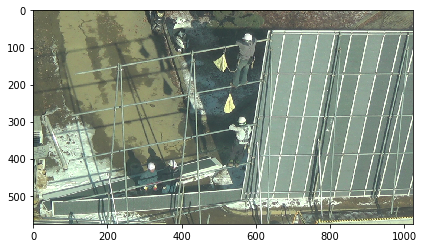

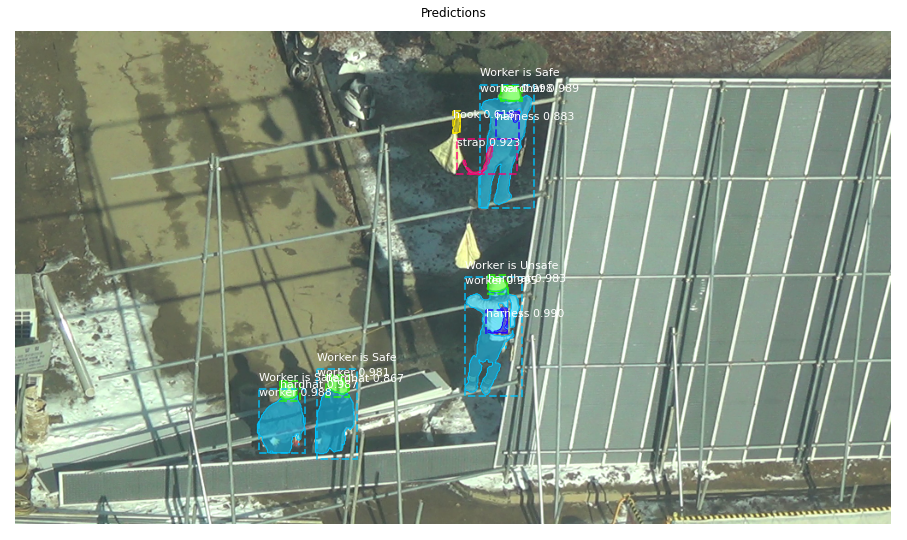

In [52]:
import skimage.io
#image_id = 26#random.choice(dataset.image_ids)
#image_id = 76
d=[35,26,70]
image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset, config, image_id, use_mini_mask=False)
info = dataset.image_info[image_id]
print("image ID: {}.{} ({}) {}".format(info["source"], info["id"], image_id, 
                                       dataset.image_reference(image_id)))

# Run object detection
#image = skimage.io.imread("/home/sai/Desktop/test3.jpg")
image=image[224:800,:,:]
skimage.io.imshow(image)
results = model.detect([image], verbose=1)

# Display results
ax = get_ax(1)
r = results[0]
#print(r['masks'])
integration=1
print(r['rois'].shape)
print(m1.shape)
print(r['class_ids'].shape)
visualize.display_instances(image, r['rois'], m1, r['class_ids'], 
                            dataset.class_names, r['scores'], ax=ax,
                            title="Predictions",integration=1,cl=cl)

[1, 2, 4]
